## 學生資訊
- 姓名：洪翌誠
- 系級：資工所碩二
- 學號：112062634

## P54 第八題
#### a. 使用 pandas 來去讀取 College.csv 的這一份文件, 透過 index_col 一併解決 b.

- 資料來源: R 的 library 中 dump 出來的

In [4]:
import pandas as pd

df = pd.read_csv("College.csv", index_col = 0)
df.head()

Private  Apps  Accept  Enroll  Top10perc  \
Abilene Christian University     Yes  1660    1232     721         23   
Adelphi University               Yes  2186    1924     512         16   
Adrian College                   Yes  1428    1097     336         22   
Agnes Scott College              Yes   417     349     137         60   
Alaska Pacific University        Yes   193     146      55         16   

                              Top25perc  F.Undergrad  P.Undergrad  Outstate  \
Abilene Christian University         52         2885          537      7440   
Adelphi University                   29         2683         1227     12280   
Adrian College                       50         1036           99     11250   
Agnes Scott College                  89          510           63     12960   
Alaska Pacific University            44          249          869      7560   

                              Room.Board  Books  Personal  PhD  Terminal  \
Abilene Christian University        3300    450      2200   70        78   
Adelphi University                  6450    750      1500   29        30   
Adrian College                      3750    400      1165   53        66   
Agnes Scott College                 5450    450       875   92        97   
Alaska Pacific University           4120    800      1500   76        72   

                              S.F.Ratio  perc.alumni  Expend  Grad.Rate  
Abilene Christian University       18.1           12    7041         60  
Adelphi University                 12.2           16   10527         56  
Adrian College                     12.9           30    8735         54  
Agnes Scott College                 7.7           37   19016         59  
Alaska Pacific University          11.9            2   10922         15

#### c.1. R 中的 summary 與 python 中 pandas 的 describe 類似

In [5]:
df.describe()

Apps        Accept       Enroll   Top10perc   Top25perc  \
count    777.000000    777.000000   777.000000  777.000000  777.000000   
mean    3001.638353   2018.804376   779.972973   27.558559   55.796654   
std     3870.201484   2451.113971   929.176190   17.640364   19.804778   
min       81.000000     72.000000    35.000000    1.000000    9.000000   
25%      776.000000    604.000000   242.000000   15.000000   41.000000   
50%     1558.000000   1110.000000   434.000000   23.000000   54.000000   
75%     3624.000000   2424.000000   902.000000   35.000000   69.000000   
max    48094.000000  26330.000000  6392.000000   96.000000  100.000000   

        F.Undergrad   P.Undergrad      Outstate   Room.Board        Books  \
count    777.000000    777.000000    777.000000   777.000000   777.000000   
mean    3699.907336    855.298584  10440.669241  4357.526384   549.380952   
std     4850.420531   1522.431887   4023.016484  1096.696416   165.105360   
min      139.000000      1.000000   2340.000000  1780.000000    96.000000   
25%      992.000000     95.000000   7320.000000  3597.000000   470.000000   
50%     1707.000000    353.000000   9990.000000  4200.000000   500.000000   
75%     4005.000000    967.000000  12925.000000  5050.000000   600.000000   
max    31643.000000  21836.000000  21700.000000  8124.000000  2340.000000   

          Personal         PhD    Terminal   S.F.Ratio  perc.alumni  \
count   777.000000  777.000000  777.000000  777.000000   777.000000   
mean   1340.642214   72.660232   79.702703   14.089704    22.743887   
std     677.071454   16.328155   14.722359    3.958349    12.391801   
min     250.000000    8.000000   24.000000    2.500000     0.000000   
25%     850.000000   62.000000   71.000000   11.500000    13.000000   
50%    1200.000000   75.000000   82.000000   13.600000    21.000000   
75%    1700.000000   85.000000   92.000000   16.500000    31.000000   
max    6800.000000  103.000000  100.000000   39.800000    64.000000   

             Expend  Grad.Rate  
count    777.000000  777.00000  
mean    9660.171171   65.46332  
std     5221.768440   17.17771  
min     3186.000000   10.00000  
25%     6751.000000   53.00000  
50%     8377.000000   65.00000  
75%    10830.000000   78.00000  
max    56233.000000  118.00000

#### c.2. 取出前 10 個 row 來去做成對的 scatter plot

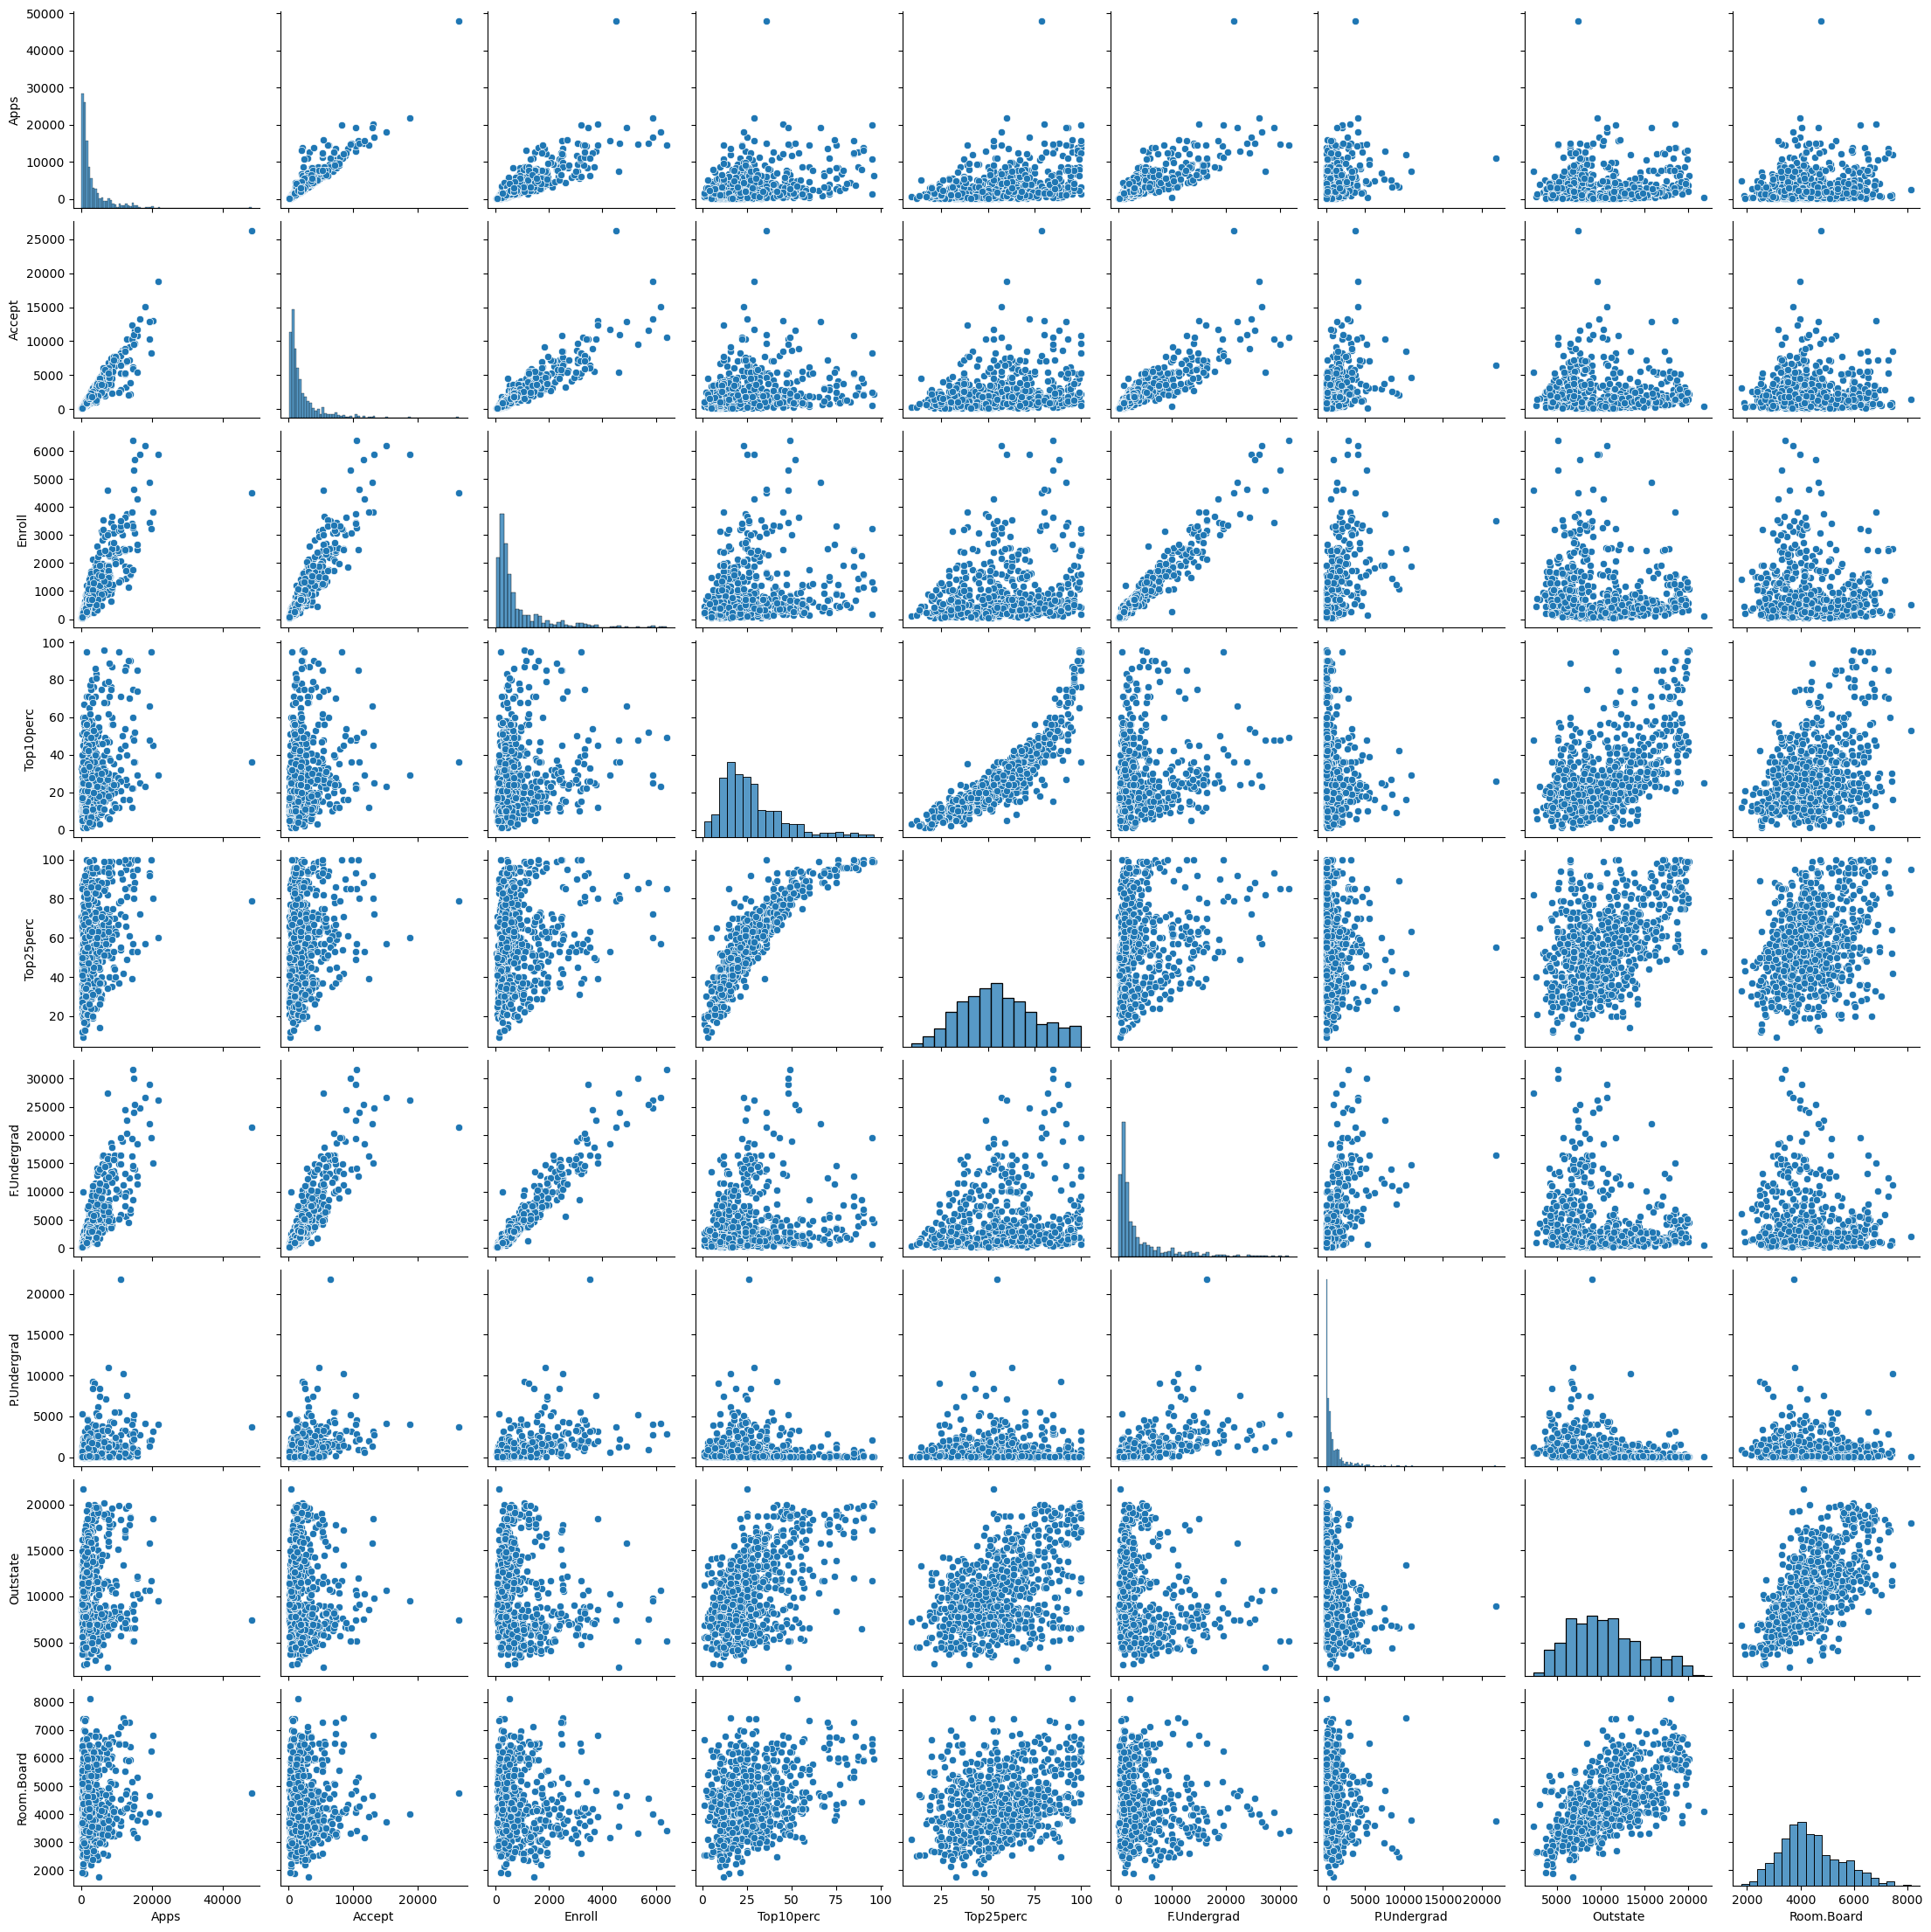

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.iloc[:, :10]

sns.pairplot(df_subset)

plt.show()

#### c.3. 目標就是希望繪製 Outstate 和 Private 的並排箱形圖

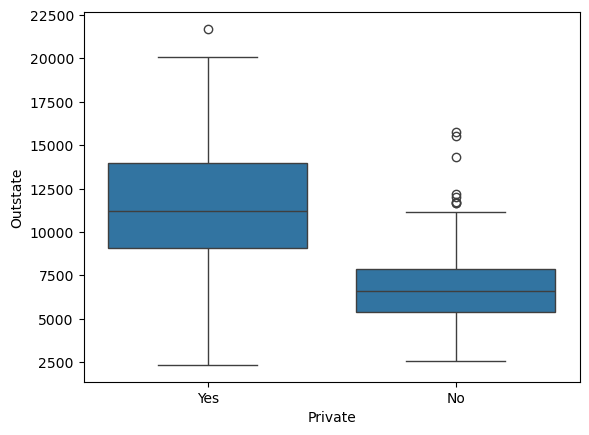

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.boxplot(x='Private', y='Outstate', data=df)

# 顯示圖表
plt.show()


#### 4. Use the summary() function to see how many elite universities there are. Now use the plot () function to produce side-by-side boxplots ofOutstate versus Elite.

Elite
No     699
Yes     78
Name: count, dtype: int64
count     777
unique      2
top        No
freq      699
Name: Elite, dtype: object


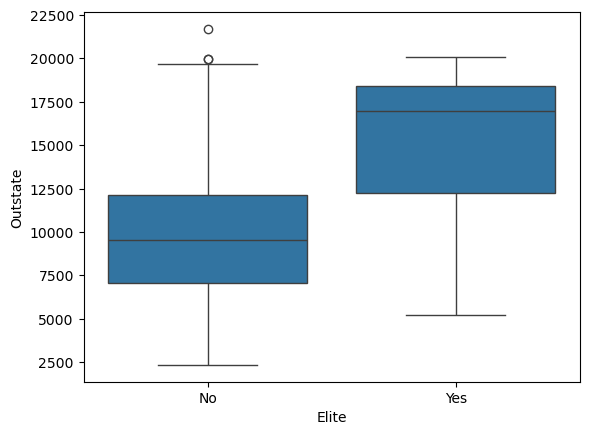

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 創建新的質變量 Elite，將 Top10perc 超過 50 的標記為 "Yes"，其餘為 "No"
df['Elite'] = pd.cut(df['Top10perc'], bins=[-float('inf'), 50, float('inf')], labels=['No', 'Yes'])

print(df['Elite'].value_counts())
print(df['Elite'].describe())

# 生成 Outstate 與 Elite 的並排箱形圖
sns.boxplot(x='Elite', y='Outstate', data=df)

# 顯示圖表
plt.show()

#### 5. Use the hist() function to produce some histograms with differing numbers of bins for a few of the quantitative variables.

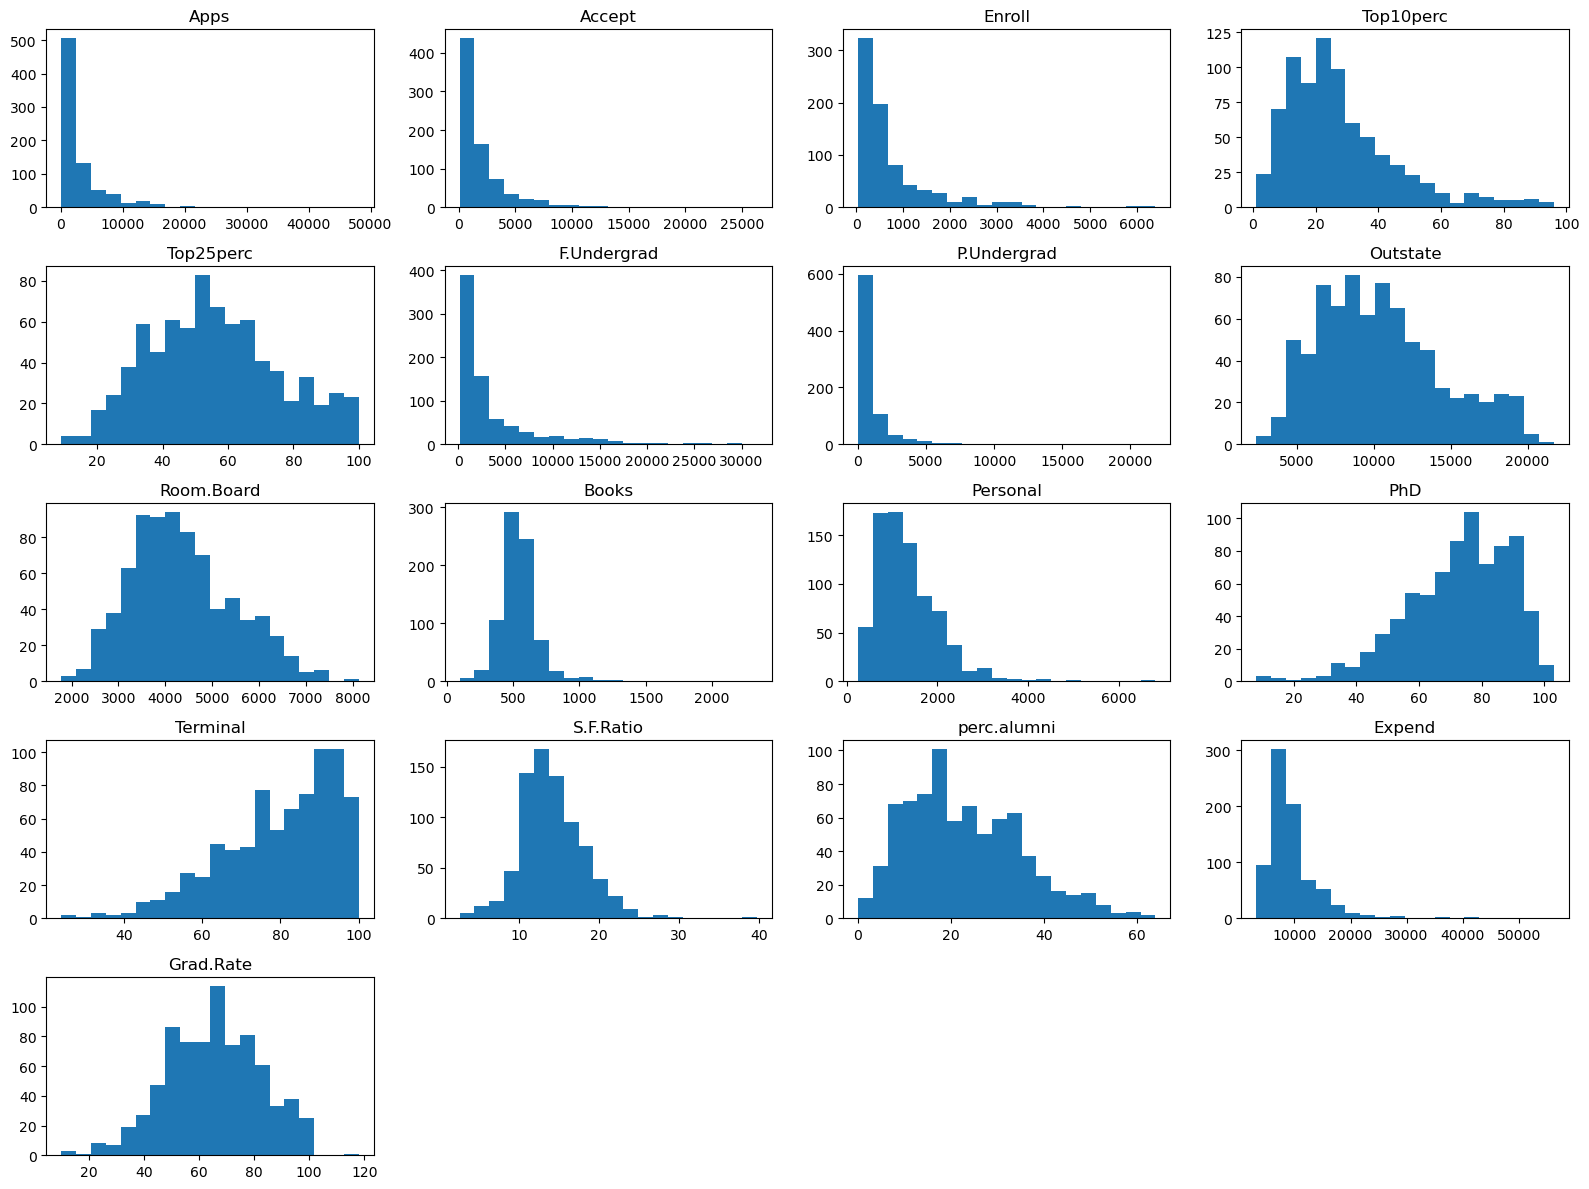

In [13]:
import matplotlib.pyplot as plt

# 欄位名稱列表
columns = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 
           'P.Undergrad', 'Outstate', 'Room.Board', 'Books', 'Personal', 'PhD', 
           'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']

# 計算行與列數量，方便繪製子圖
n_cols = 4  # 每行4個圖表
n_rows = (len(columns) + n_cols - 1) // n_cols  # 計算總行數

# 設置子圖
fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, 12))

# 繪製每個欄位的直方圖
for i, col in enumerate(columns):
    row = i // n_cols
    col_idx = i % n_cols
    axes[row, col_idx].hist(df[col], bins=20)  # 設置 bins 為 20
    axes[row, col_idx].set_title(col)

# 移除空白的子圖（如果有）
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# 調整子圖之間的間距
plt.tight_layout()

# 顯示圖表
plt.show()


#### 6. Continue exploring the data, and provide a brief summary of what you discover.

### 觀察
- 美國大學平均收到約 3001 份申請，其中約 2018 人被錄取，約 779 人註冊入學。
- App（申請）、Accept（錄取）、F.Undergrad（全職本科生人數）、P.Undergrad（兼職本科生人數） 和 Enroll（註冊）的標準差較大，這表明數據分布廣泛。
- 約有 565 所大學是私立的。
- 平均房租、書籍費用和個人開支分別為 4350 美元、550 美元和 1350 美元。
- 書籍費用整體呈現常態分佈，但有離群值，最大值來到了 2340 美元，也代表著有部分學校的書籍費特別的貴

### 資料問題
- PhD 是百分比，但最大值達到 103%，需要檢查這一點。
- Grad.Rate 也是百分比，但最大值達到 118%，也需要檢查這一點。

## P56 第十題
- [資料來源](https://www.kaggle.com/c/boston-housing/data)
#### a. How many rows are inthis data set? How many columns? What do the rows and columns represent?

In [39]:
import pandas as pd

boston = pd.read_csv("boston_data.csv")

print(boston.head())

rows, cols = boston.shape
print(f'rows: {rows}, columns: {cols}')


      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
rows: 506, columns: 14


#### b. Make some pairwise scatterplots of the predictors (columns) in this data set.
- RM（每個住宅的平均房間數）與房價（通常用 MEDV 表示）之間的正相關，顯示房間數越多，房價通常也越高。
- LSTAT（低收入人口的百分比）與房價之間的負相關，顯示低收入人口比例越高，房價越低。

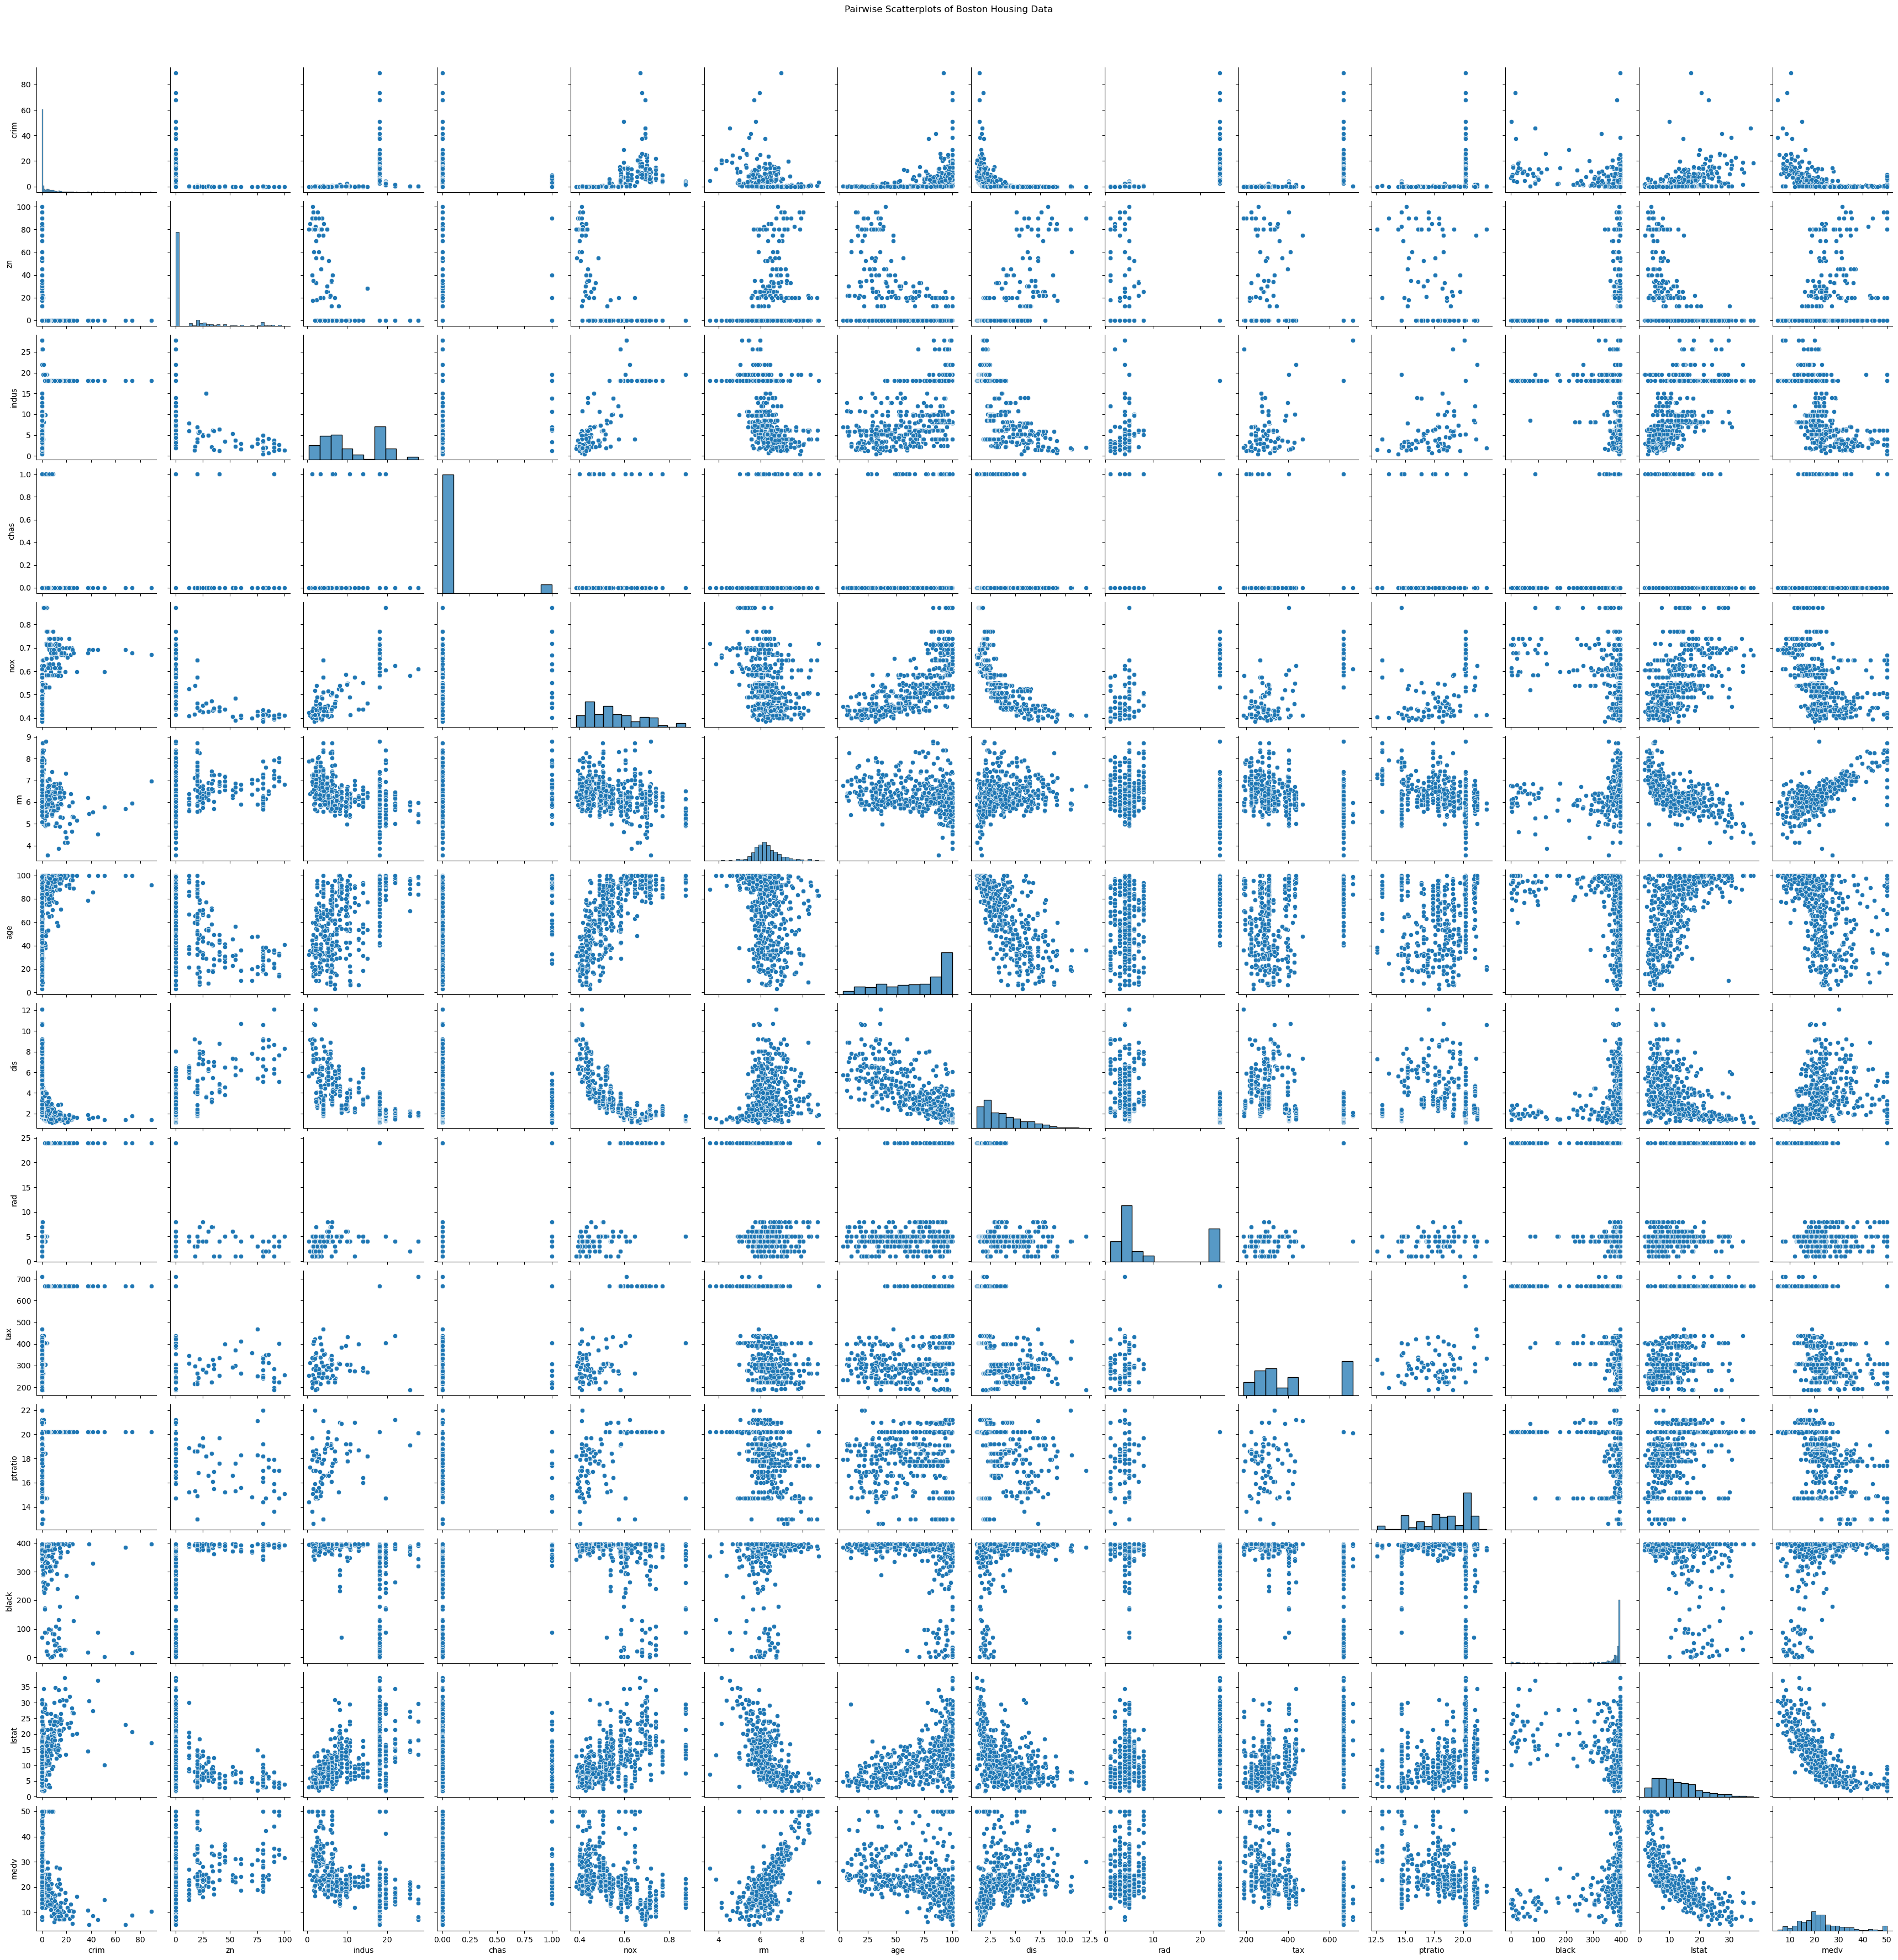

In [21]:
# 繪製成對散點圖
sns.pairplot(boston)
plt.suptitle('Pairwise Scatterplots of Boston Housing Data', y=1.02)  # 調整標題位置
plt.show()

#### c. Are any ofthe predictors associated with per capita crime rate?
- 與 rad 呈現正相關，意味著 rad 上升時犯罪率也比較容易上升
- 與 tax 呈現正相關，當稅率越高時犯罪率也比較容易上升，可能是因為經濟條件較差的區域的稅收負擔較重，進而影響社區的安全性。
- indus  相關係數為 0.406，顯示與工業區域的比例有一定的正相關，這可能與工業活動引起的社會問題和潛在的犯罪有關。

相關係數與 CRIM：
crim       1.000000
zn        -0.200469
indus      0.406583
chas      -0.055892
nox        0.420972
rm        -0.219247
age        0.352734
dis       -0.379670
rad        0.625505
tax        0.582764
ptratio    0.289946
black     -0.385064
lstat      0.455621
medv      -0.388305
Name: crim, dtype: float64


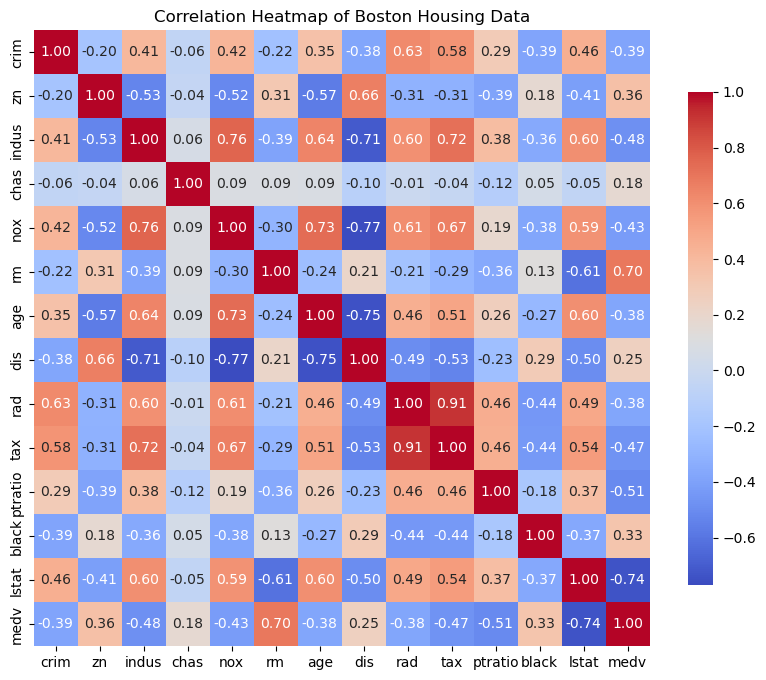

In [24]:
# 計算相關係數矩陣
correlation_matrix = boston.corr()

# 提取 CRIM 列的相關係數
crim_correlation = correlation_matrix['crim']

# 顯示 CRIM 的相關係數
print("相關係數與 CRIM：")
print(crim_correlation)

# 繪製熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Boston Housing Data')
plt.show()


#### d. Do any of the suburbs of Boston appear to haveparticularly high crimerates? Tax rates? Pupil-teacher ratios? Comment on the range of each predictor.
- 由下面兩個圖可以得知，在 tax 高或者 ptratio 高的時候通常比較容易出現高 crim

In [28]:

# 添加目標變量 'CRIM' (犯罪率)

# 查看犯罪率、稅率和學生與教師比例的範圍
crime_rate_range = boston['crim'].describe()
tax_rate_range = boston['tax'].describe()
pupil_teacher_ratio_range = boston['ptratio'].describe()

# 輸出範圍
print("犯罪率範圍：\n", crime_rate_range)
print("\n稅率範圍：\n", tax_rate_range)
print("\n學生與教師比例範圍：\n", pupil_teacher_ratio_range)


犯罪率範圍：
 count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

稅率範圍：
 count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

學生與教師比例範圍：
 count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


犯罪率範圍：
 count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: crim, dtype: float64

稅率範圍：
 count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

學生與教師比例範圍：
 count    506.000000
mean      18.455534
std        2.164946
min       12.600000
25%       17.400000
50%       19.050000
75%       20.200000
max       22.000000
Name: ptratio, dtype: float64


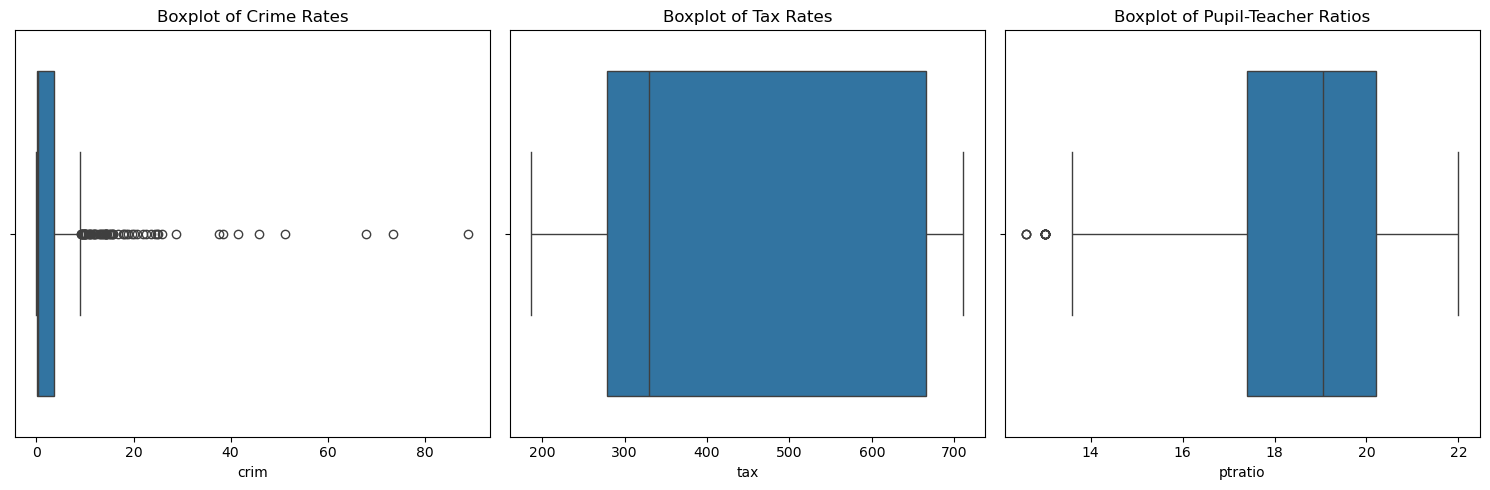

In [41]:
# 查看犯罪率、稅率和學生與教師比例的範圍
crime_rate_range = boston['crim'].describe()
tax_rate_range = boston['tax'].describe()
pupil_teacher_ratio_range = boston['ptratio'].describe()

# 輸出範圍
print("犯罪率範圍：\n", crime_rate_range)
print("\n稅率範圍：\n", tax_rate_range)
print("\n學生與教師比例範圍：\n", pupil_teacher_ratio_range)

# 可視化數據
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='crim', data=boston)
plt.title('Boxplot of Crime Rates')

plt.subplot(1, 3, 2)
sns.boxplot(x='tax', data=boston)
plt.title('Boxplot of Tax Rates')

plt.subplot(1, 3, 3)
sns.boxplot(x='ptratio', data=boston)
plt.title('Boxplot of Pupil-Teacher Ratios')

plt.tight_layout()
plt.show()


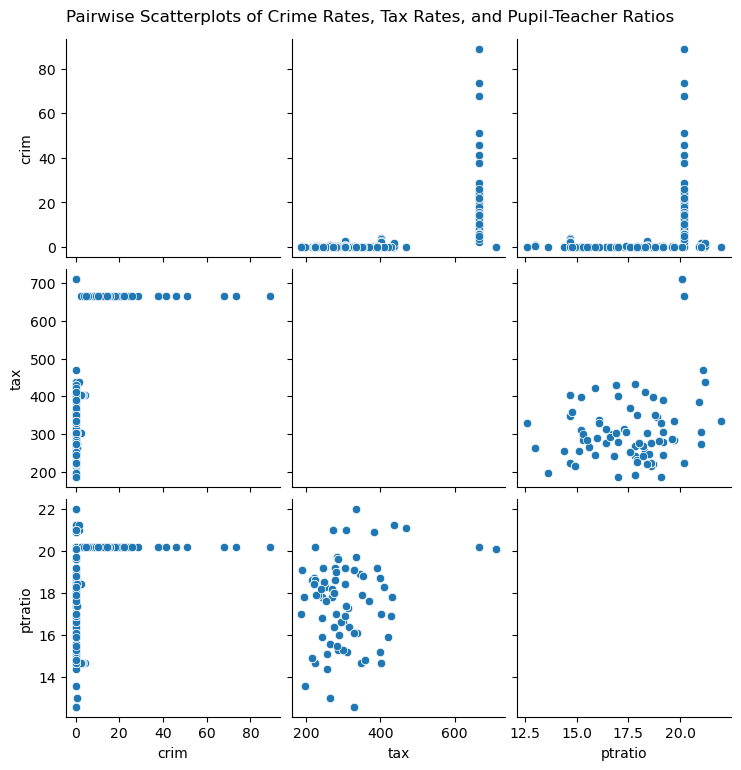

In [43]:
variables = ['crim', 'tax', 'ptratio']

sns.pairplot(boston[variables], diag_kind='scatter')

plt.suptitle('Pairwise Scatterplots of Crime Rates, Tax Rates, and Pupil-Teacher Ratios', y=1.02)
plt.show()


## p121 第八題

In [48]:
Auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


- 由於發現 horsepower 有空值所以透過 fillna 的方式去填補他並且填補平均數。

In [78]:
import pandas as pd
import statsmodels.api as sm

# 假設你已經有一個 pandas DataFrame，名稱為 'Auto'，包含 'mpg' 和 'horsepower' 欄位
# 讀取數據（如果數據來自一個 CSV 文件）
Auto = pd.read_csv('Auto.csv')
Auto["horsepower"] = Auto["horsepower"].fillna(Auto["horsepower"].mean())

# 自變數 X 和 依變數 y
X = Auto['horsepower']
y = Auto['mpg']


# 添加常數項（截距項）以進行迴歸
X = sm.add_constant(X)

# 構建線性迴歸模型
model = sm.OLS(y, X).fit()

# 輸出模型摘要
print(model.summary())

# 對結果的評論可以根據輸出的值進行分析


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.594
Method:                 Least Squares   F-statistic:                     580.6
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           1.45e-79
Time:                        15:26:16   Log-Likelihood:                -1200.1
No. Observations:                 397   AIC:                             2404.
Df Residuals:                     395   BIC:                             2412.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         40.0058      0.729     54.903      0.0

- 在這個訓練好的模型之中我們可以看到 R-squared 約為 0.595 在模型上有一定的解釋力，但整體的預測效果不夠理想。
- const (截距)：40.0058，這表示當 horsepower 為 0 時，mpg 的預測值是 40.0058。
- horsepower (自變數)：-0.1578，這個係數表示 horsepower 每增加一單位，mpg 平均會減少 0.1578。因為係數是負數，說明 horsepower 和 mpg 之間存在負相關。
- P>|t|：對應截距（const）和 horsepower 的 P 值都為 0.000，表示這兩者在 99% 信心水平下都顯著，這意味著這些係數顯著地影響應變數（mpg）。

## P122 第九題
### a. Produce a scatterplot matrix which includes all of the variables in the data set.

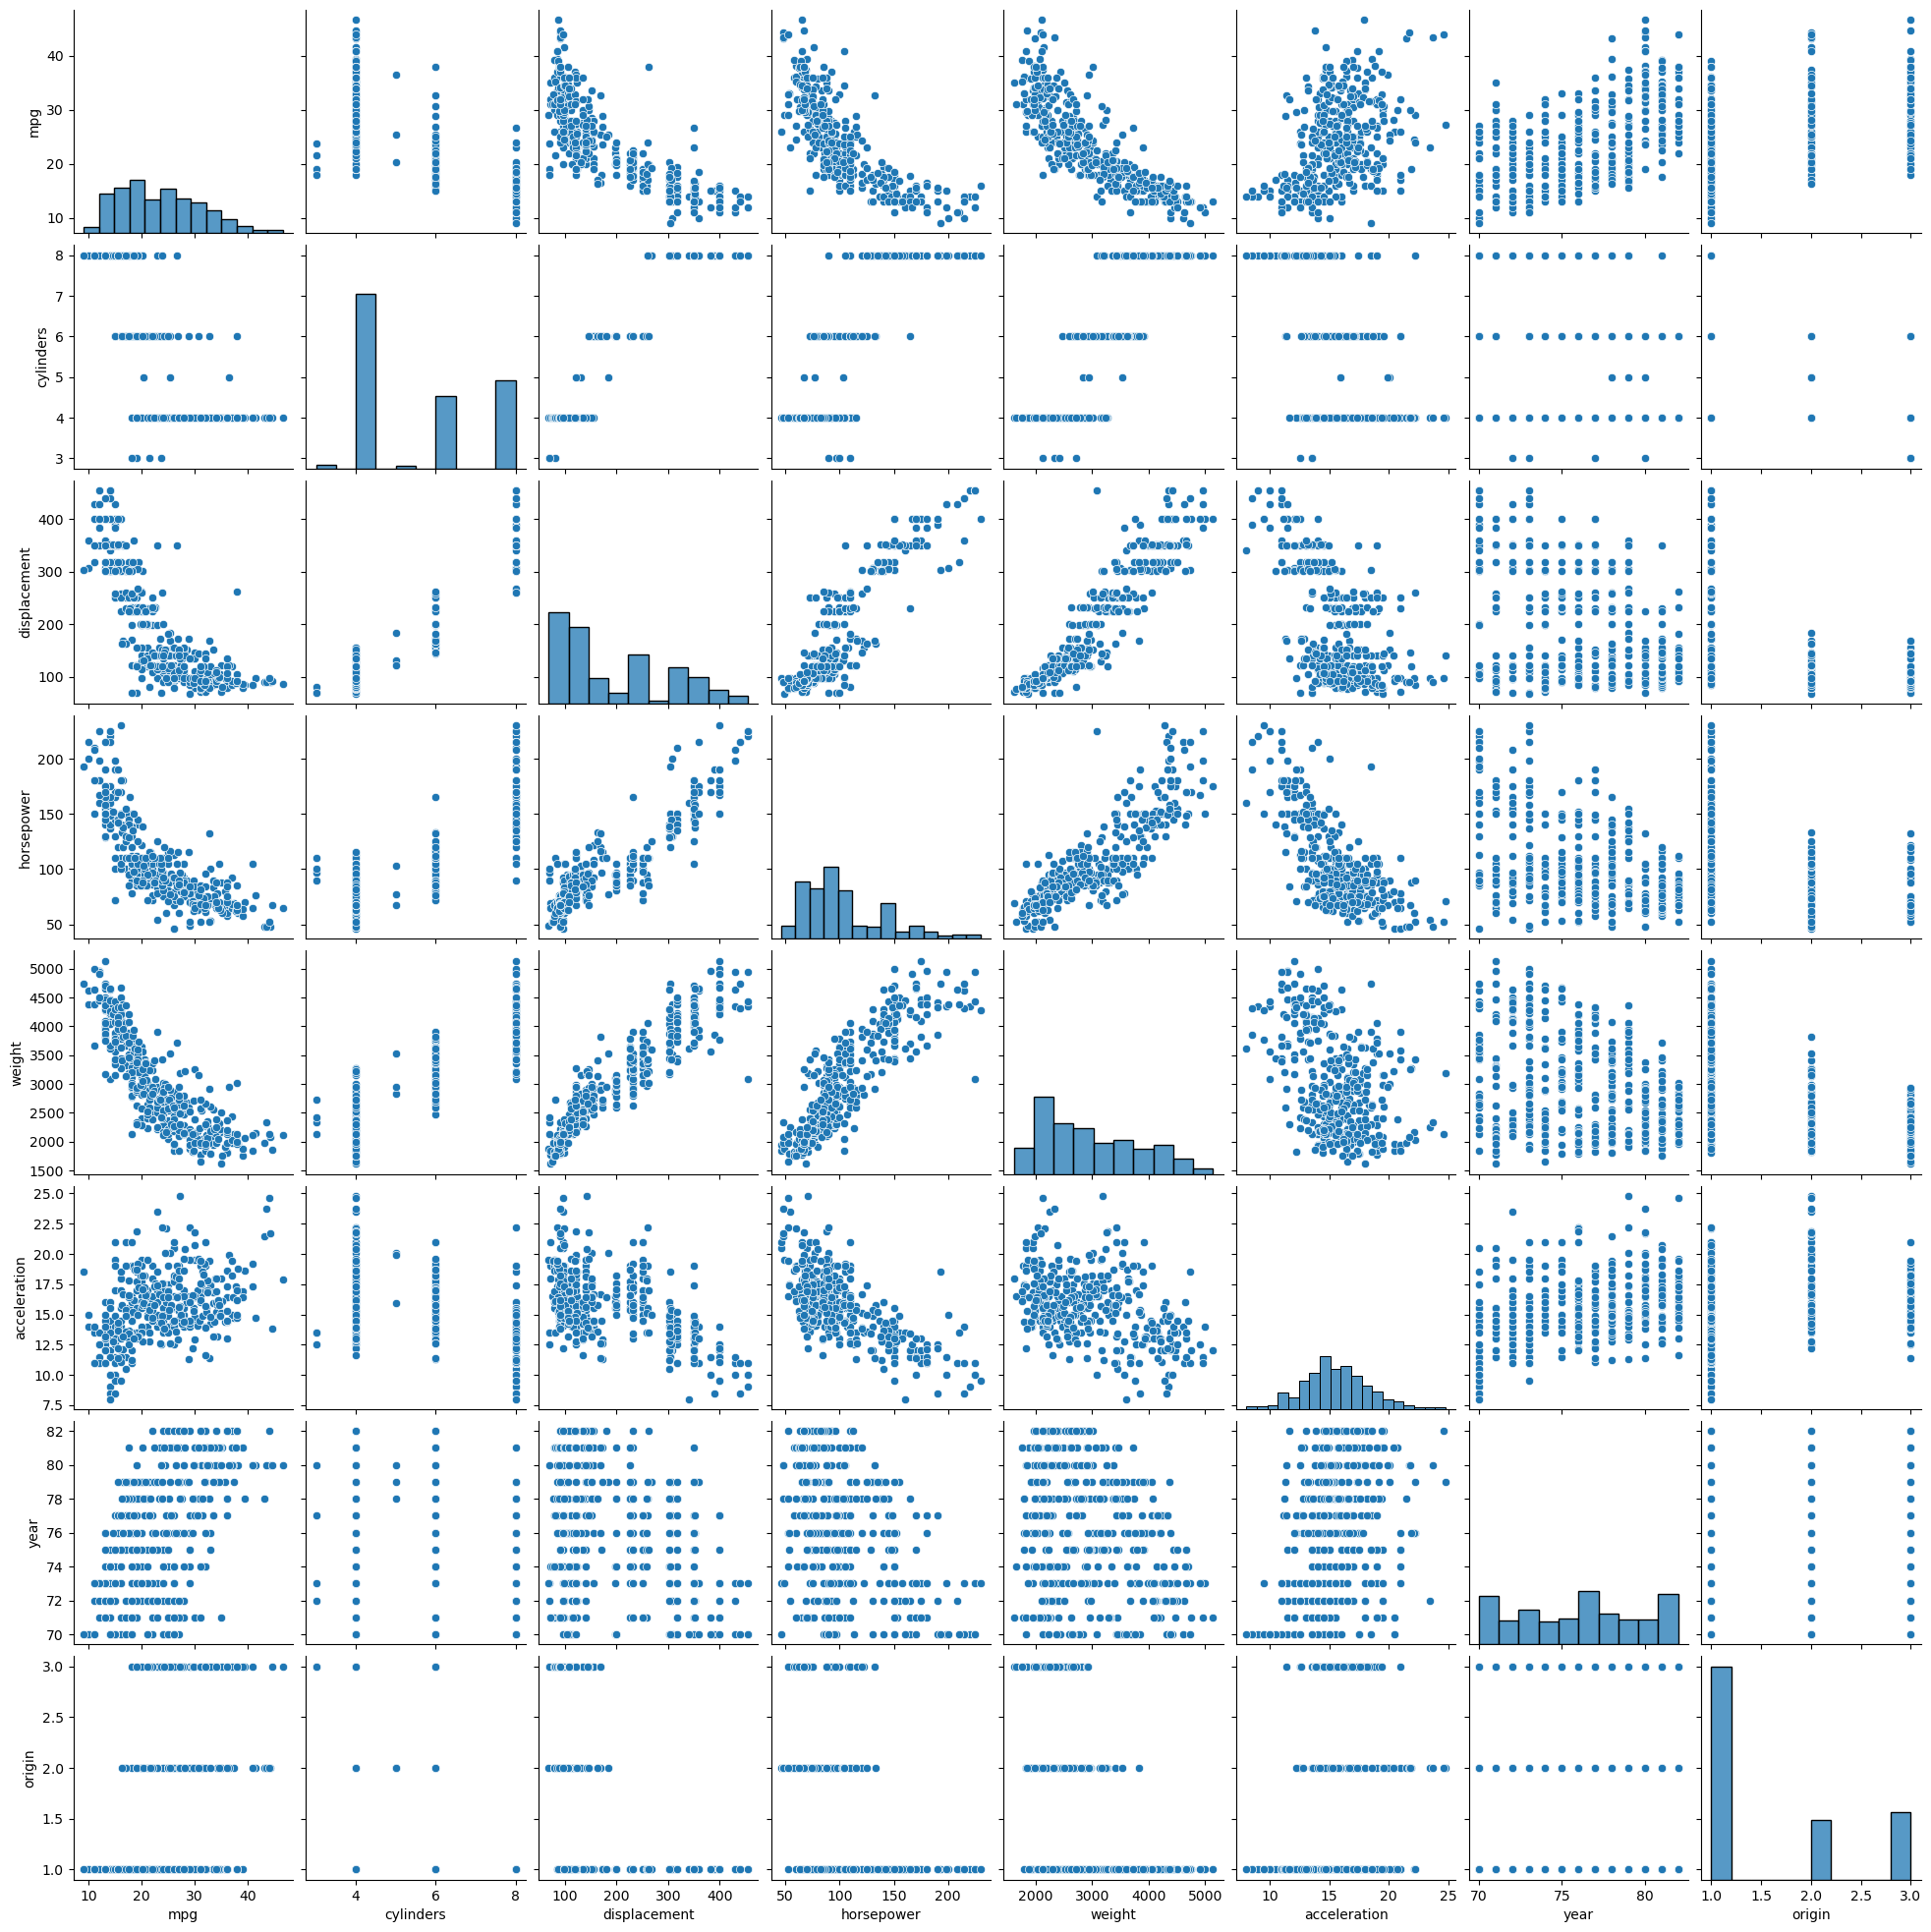

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製散佈圖矩陣，包含所有變數
sns.pairplot(Auto)

# 顯示圖表
plt.show()

### b. Compute the matrix of correlations between the variables using the function cor(). You wil need to exclude the name variable, cor() which is qualitative.

corr matrix:
                   mpg  cylinders  displacement  horsepower    weight  \
mpg           1.000000  -0.776260     -0.804443   -0.771441 -0.831739   
cylinders    -0.776260   1.000000      0.950920    0.839715  0.897017   
displacement -0.804443   0.950920      1.000000    0.893833  0.933104   
horsepower   -0.771441   0.839715      0.893833    1.000000  0.860581   
weight       -0.831739   0.897017      0.933104    0.860581  1.000000   
acceleration  0.422297  -0.504061     -0.544162   -0.687039 -0.419502   
year          0.581469  -0.346717     -0.369804   -0.413022 -0.307900   
origin        0.563698  -0.564972     -0.610664   -0.453962 -0.581265   

              acceleration      year    origin  
mpg               0.422297  0.581469  0.563698  
cylinders        -0.504061 -0.346717 -0.564972  
displacement     -0.544162 -0.369804 -0.610664  
horsepower       -0.687039 -0.413022 -0.453962  
weight           -0.419502 -0.307900 -0.581265  
acceleration      1.000000  0.28290

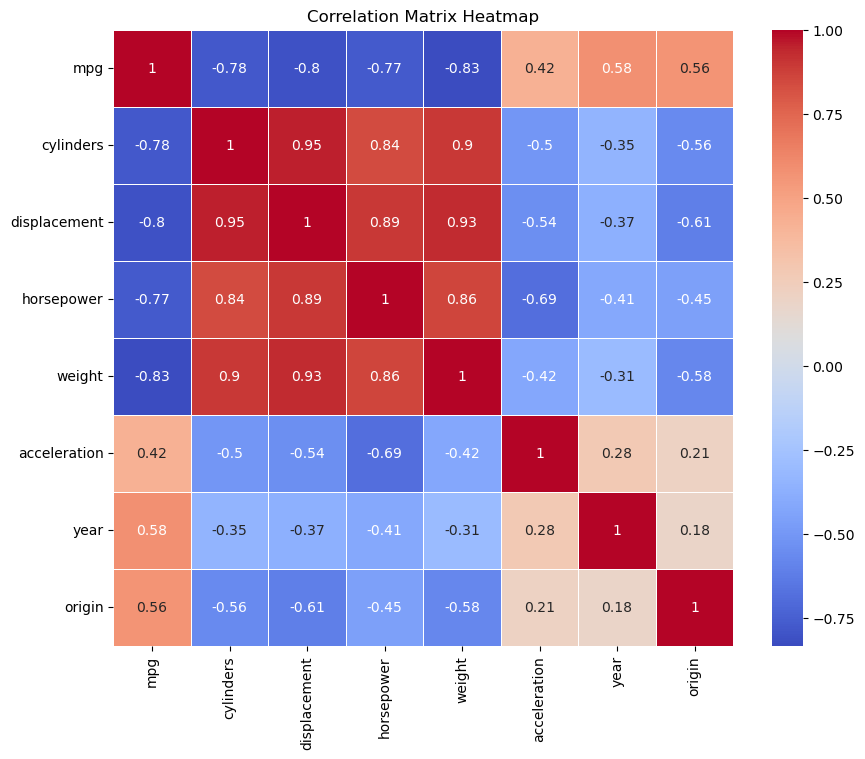

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# 排除 name 欄位
Auto_numeric = Auto.drop(columns=['name'])

# 計算數值變數之間的相關性矩陣
correlation_matrix = Auto_numeric.corr()

# 繪製相關性矩陣的熱圖
plt.figure(figsize=(10, 8))  # 設置圖表大小
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

print("corr matrix:")
print(correlation_matrix)


# 顯示圖表
plt.title('Correlation Matrix Heatmap')
plt.show()


### c. Use the 1m) function to perform a multiple linear regression with mpg as theresponse and all other variables except name as the predictors. Use the summary () function to print the results. Commento n the output.

In [79]:
import pandas as pd
import statsmodels.api as sm

# 將自變數設為除了 'mpg' 和 'name' 的其他變數
X = Auto.drop(columns=['mpg', 'name'])

# 添加常數項
X = sm.add_constant(X)

# 應變數
y = Auto['mpg']

# 進行多元線性回歸
model = sm.OLS(y, X)
results = model.fit()

# 列印回歸結果摘要
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     256.0
Date:                Sun, 06 Oct 2024   Prob (F-statistic):          2.41e-141
Time:                        15:26:22   Log-Likelihood:                -1037.4
No. Observations:                 397   AIC:                             2091.
Df Residuals:                     389   BIC:                             2123.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -18.7116      4.609     -4.060   

In [77]:
Auto.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0       130.0    3504          12.0    70   
1  15.0          8         350.0       165.0    3693          11.5    70   
2  18.0          8         318.0       150.0    3436          11.0    70   
3  16.0          8         304.0       150.0    3433          12.0    70   
4  17.0          8         302.0       140.0    3449          10.5    70   

   origin                       name     x3  
0       1  chevrolet chevelle malibu  28032  
1       1          buick skylark 320  29544  
2       1         plymouth satellite  27488  
3       1              amc rebel sst  27464  
4       1                ford torino  27592

1. Is there a relationship between the predictors and the response?
- R-squared 是模型解釋變異的比例。在這個模型中，R-squared 為 0.822，表示自變數解釋了 82.2% 的應變數變異。這表明模型具有很強的解釋力，所以自變數與應變數之間存在明顯的關聯。
- 從摘要中看到一些變數的 p-value 小於 0.05，例如 displacement、weight、year 和 origin，表明這些自變數對 mpg 有顯著的影響。
2. Which predictors appear to have a statistically significant relationship to the response?
- Displacement (p-value = 0.012)：顯著正相關
- Weight (p-value = 0.000)：顯著負相關
- Year (p-value = 0.000)：顯著正相關
- Origin (p-value = 0.000)：顯著正相關
3. What does the coefficient for the year variable suggest?
- Year 變數的係數為 0.7625。這意味著每增加一個年份，車輛的燃油效率 (mpg) 平均會增加約 0.7625 英里每加侖。換句話說，更新的車型相比於較舊的車型，更加省油，這可能與車輛技術的進步或環保法規的改進有關。 

#### d. Use the plot () function to produce diagnostic plotsof the linear regression fit.

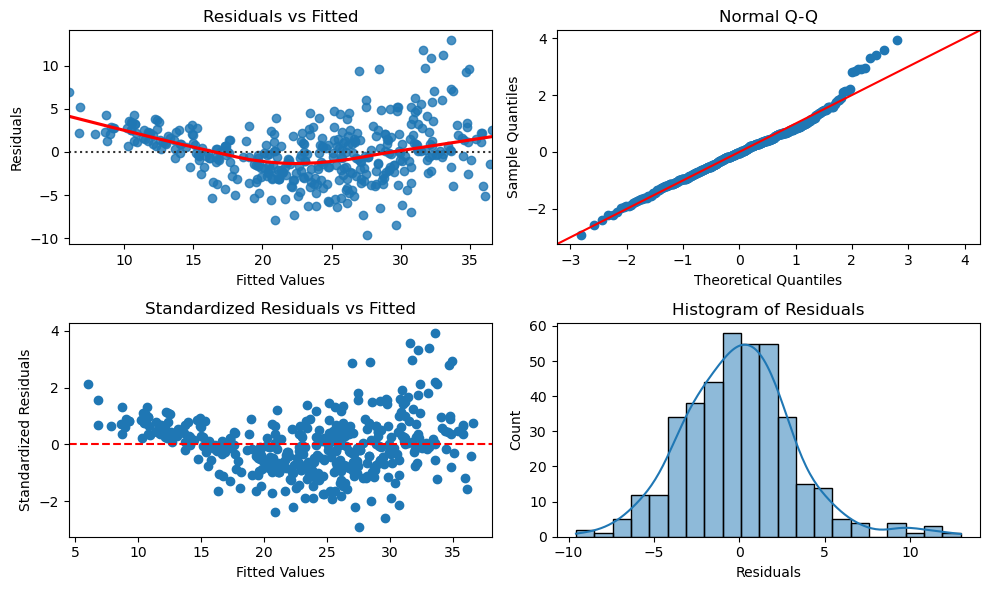

In [16]:
import numpy as np
# 殘差
residuals = results.resid

# 預測值
fitted = results.fittedvalues

# 1. 殘差 vs 預測值
plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
sns.residplot(x=fitted, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted')

# 2. QQ圖：檢查殘差的正態性
plt.subplot(2, 2, 2)
sm.qqplot(residuals, line='45', fit=True, ax=plt.gca())
plt.title('Normal Q-Q')

# 3. 標準化殘差 vs 標準化預測值
plt.subplot(2, 2, 3)
standardized_residuals = (residuals - np.mean(residuals)) / np.std(residuals)
plt.scatter(fitted, standardized_residuals)
plt.axhline(y=0, linestyle='--', color='red')
plt.xlabel('Fitted Values')
plt.ylabel('Standardized Residuals')
plt.title('Standardized Residuals vs Fitted')

# 4. 殘差的直方圖：檢查殘差的分佈
plt.subplot(2, 2, 4)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

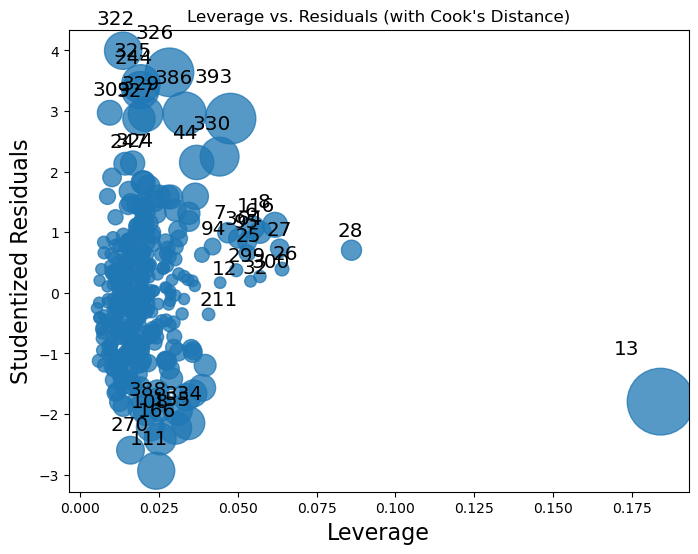

In [24]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

# leverage plot
fig, ax = plt.subplots(figsize=(8, 6))

# 使用 statsmodels 的 influence_plot 生成杠桿圖
sm.graphics.influence_plot(results, ax=ax, criterion="cooks")

plt.title("Leverage vs. Residuals (with Cook's Distance)")
# plt.show()
plt.savefig("test.png")

#### d.
可以利用 Q-Q plot 來檢視殘差是否符合常態分佈，再根據此圖找出是否存在有異常值或者離群值的部分，可以看到我這邊訓練玩模型過後，將殘差拿出來去做 Q-Q plot 繪製過後發現，較大殘差的部分存在一定程度的離群值，使得偏離常態分佈。

另外我這邊透過使用 influence_plot 來去觀測樣本的槓桿值，觀測點 13 特別顯眼，具有極高的槓桿值（約 0.175），並且相對較大的 Cook's 距離（由大圓圈顯示）。這意味著它對回歸模型有非常大的影響力。

#### e. Use the * and : symbols to fit linear regression models with interactioneffects. Doa n y interactions appear to be statistically significant?

In [92]:
import statsmodels.formula.api as smf

interactions = []

# 去除 mpg 跟 name
feature_cols = Auto.columns[1:-1]

for col1_index in range(len(feature_cols)):
    for col2_index in range(col1_index + 1, len(feature_cols)):

        # 製作需要求出的交互作用指令
        command = f'mpg ~ {feature_cols[col1_index]} * {feature_cols[col2_index]}'
        model = smf.ols(command, data=Auto).fit()
        
        # print(model.summary())

        # 提取 p-value
        p_value = model.pvalues[f'{feature_cols[col1_index]}:{feature_cols[col2_index]}']
        # 將 p-value 小於 0.05 的顯著交互特徵提取出來
        if p_value < 0.05:
            interactions.append((feature_cols[col1_index], feature_cols[col2_index], p_value))

for feature1, feature2, p_value in interactions:
    # 將顯著交互的特徵列印出來並且列印出該交互項的 p-value 小數點娶到後兩位
    print(f"{feature1} 與 {feature2} 具有顯著的交互作用\np value 為:{p_value:.2f} 小於 0.5")
    print("=============")

cylinders 與 displacement 具有顯著的交互作用
p value 為:0.00 小於 0.5
cylinders 與 horsepower 具有顯著的交互作用
p value 為:0.00 小於 0.5
cylinders 與 weight 具有顯著的交互作用
p value 為:0.00 小於 0.5
cylinders 與 year 具有顯著的交互作用
p value 為:0.00 小於 0.5
displacement 與 horsepower 具有顯著的交互作用
p value 為:0.00 小於 0.5
displacement 與 weight 具有顯著的交互作用
p value 為:0.00 小於 0.5
displacement 與 acceleration 具有顯著的交互作用
p value 為:0.00 小於 0.5
displacement 與 year 具有顯著的交互作用
p value 為:0.00 小於 0.5
displacement 與 origin 具有顯著的交互作用
p value 為:0.00 小於 0.5
horsepower 與 weight 具有顯著的交互作用
p value 為:0.00 小於 0.5
horsepower 與 acceleration 具有顯著的交互作用
p value 為:0.00 小於 0.5
horsepower 與 year 具有顯著的交互作用
p value 為:0.00 小於 0.5
horsepower 與 origin 具有顯著的交互作用
p value 為:0.00 小於 0.5
weight 與 acceleration 具有顯著的交互作用
p value 為:0.00 小於 0.5
weight 與 year 具有顯著的交互作用
p value 為:0.00 小於 0.5
weight 與 origin 具有顯著的交互作用
p value 為:0.03 小於 0.5


## P123
### 第10題

In [102]:

# 讀取數據集
data = pd.read_csv('Carseats.csv')
# 列印出前五項資料觀察
data.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No

#### a. Fit a multiple regression model to predict Sales using Price, Urban, and US.

In [103]:
# 將 Urban 和 US 轉換為數字變量（0/1）
data['Urban'] = data['Urban'].map({'Yes': 1, 'No': 0})
data['US'] = data['US'].map({'Yes': 1, 'No': 0})

# 定義自變量 X 和因變量 y
X = data[['Price', 'Urban', 'US']]
y = data['Sales']

# 加入常數項
X = sm.add_constant(X)

# 擬合多重迴歸模型
model = sm.OLS(y, X)
results = model.fit()

# 輸出模型摘要
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.39e-23
Time:                        15:43:02   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.0

#### b. Provide an interpretation of each coefficient in the model. Be careful-some of the variables in the model are qualitative!
- const (截距) = 13.0435:

當所有自變量（Price、Urban 和 US）均為零時，預測的銷售量（Sales）為 13.0435。

- Price = -0.0545:

這表示當價格每增加 1 單位（例如 $1），預測的銷售量將減少約 0.0545 單位。在此模型中，價格和銷售量之間存在負相關，這表明提高價格可能會導致銷售量下降。

- Urban = -0.0219:

由於 Urban 是一個qualitative，這個係數表示與基準類別（Urban = No）相比，如果商店位於城市地區（Urban = Yes）。

- US = 1.2006:

同樣，US 也是一個qualitative。這個係數表示與基準類別（US = No）相比，如果商店位於美國（US = Yes），預測的銷售量將增加約 1.2006 單位。

#### c. Write out the model in equation form, being careful to handle the qualitative variables properly.
$\text{Sales} = 13.0435 - 0.0545 \times \text{Price} - 0.0219 \times \text{Urban}_{\text{Yes}} + 1.2006 \times \text{US}_{\text{Yes}}$


#### d. For which of the predictors can you reject the null hypothesis Ho : Bj = 0?
由於 Urban 這個特徵的 p-value > 0.05，所以無法拒絕 Urban 這個特徵的虛無假設

#### e

In [107]:
# 讀取數據集
data = pd.read_csv('Carseats.csv')
# 將 Urban 和 US 轉換為數字變量（0/1）
data['US'] = data['US'].map({'Yes': 1, 'No': 0})

# 定義自變量 X 和因變量 y
X = data[['Price', 'US']]
y = data['Sales']

# 加入常數項
X = sm.add_constant(X)

# 擬合多重迴歸模型
model = sm.OLS(y, X)
results = model.fit()

# 輸出模型摘要
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 06 Oct 2024   Prob (F-statistic):           2.66e-24
Time:                        16:09:25   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.0

#### f How well do the models in (a) and (e) fit the data?
- 兩個模型的原始 R-square 都是 0.239 但是在 adj R-square 上面，後者反而更高，原因在於減少了解釋力低的特徵

#### g. Using themodel from (e), obtain 95% confidence intervals for the coefficient(s).
- Price 這個變數的影響有 95% 的信心，真正的影響值（係數）會落在 -0.065 到 -0.044 之間
- US 這個變數的影響有 95% 的信心，真正的影響值（係數）會落在 -0.065 到 -0.044 之間